In [1]:
import torch.optim as optim
import gymnasium as gym

from simple_ppo import PPO
from simple_ppo.policy import ContinuMlpPolicy
from simple_ppo.utils import evaluate, plot

In [2]:
policy = ContinuMlpPolicy(state_dim=17, action_dim=6, sd_init=0.6, sd_rng=(0.01, 0.6))
optimizer = optim.Adam(policy.parameters(), lr=0.0001)

In [3]:
env = gym.make('Walker2d-v4', render_mode=None)
env_eval = gym.make('Walker2d-v4', render_mode=None)

agent = PPO(policy, optimizer, env, env_eval,
            gamma=0.99, gae_lambda=0.95, n_step=2048, batch_size=64, n_epochs=16,
            clip_eps=0.1, vf_coef=1.0, ent_coef=0.01, max_grad_norm=1.0,
            eval_num=4)

log = agent.train(total_timesteps=1000000)

env.close()
env_eval.close()

| timestep   2048 | policy   +0.397 | value   +1.546 | entropy   +0.908 | reward   +27.2 |
| timestep   4096 | policy   -0.769 | value   +1.719 | entropy   +0.895 | reward  +251.4 |
| timestep   6144 | policy   -3.260 | value   +3.296 | entropy   +0.861 | reward  +260.5 |
| timestep   8192 | policy   -3.629 | value   +4.275 | entropy   +0.826 | reward  +342.1 |
| timestep  10240 | policy   -4.616 | value   +5.205 | entropy   +0.797 | reward  +356.7 |
| timestep  12288 | policy   -4.811 | value   +5.757 | entropy   +0.770 | reward  +281.3 |
| timestep  14336 | policy   -5.355 | value   +6.916 | entropy   +0.744 | reward  +259.8 |
| timestep  16384 | policy   -6.665 | value   +8.813 | entropy   +0.720 | reward  +273.2 |
| timestep  18432 | policy   -4.276 | value   +7.387 | entropy   +0.703 | reward  +297.4 |
| timestep  20480 | policy   -9.056 | value  +11.617 | entropy   +0.679 | reward  +278.3 |
| timestep  22528 | policy   -9.549 | value  +12.998 | entropy   +0.654 | reward  +294.8 |

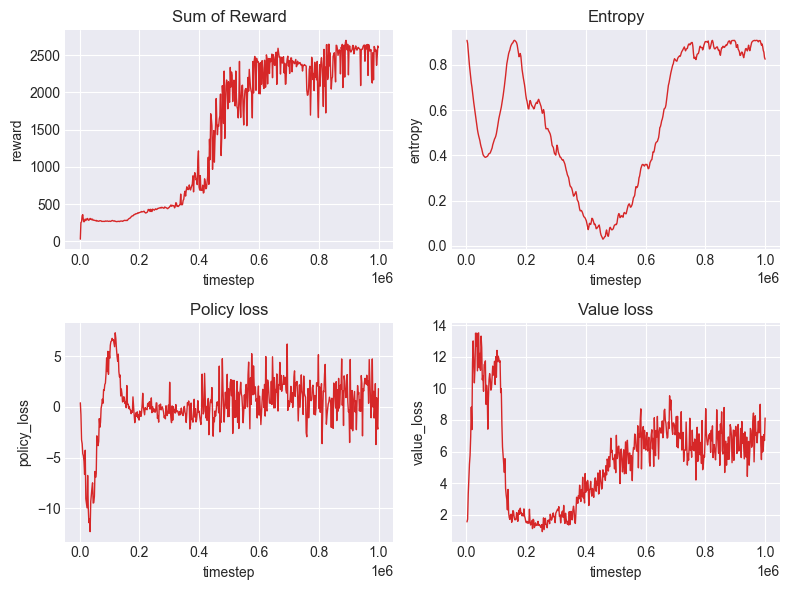

In [4]:
plot(log)

In [5]:
env = gym.make('Walker2d-v4', render_mode=None)
mean, std = evaluate(policy, env, eval_num=32)
env.close()

print('mean : %f    std : %f'%(mean, std))

c:\Users\gram15\Documents\1 My Folder\Projects\Simple-PPO\venv\Lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment Walker2d-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


mean : 2600.043457    std : 40.062450


In [9]:
env = gym.make('Walker2d-v4', render_mode='human')
total_reward, _ = evaluate(policy, env, eval_num=1, deterministic=True)
env.close()